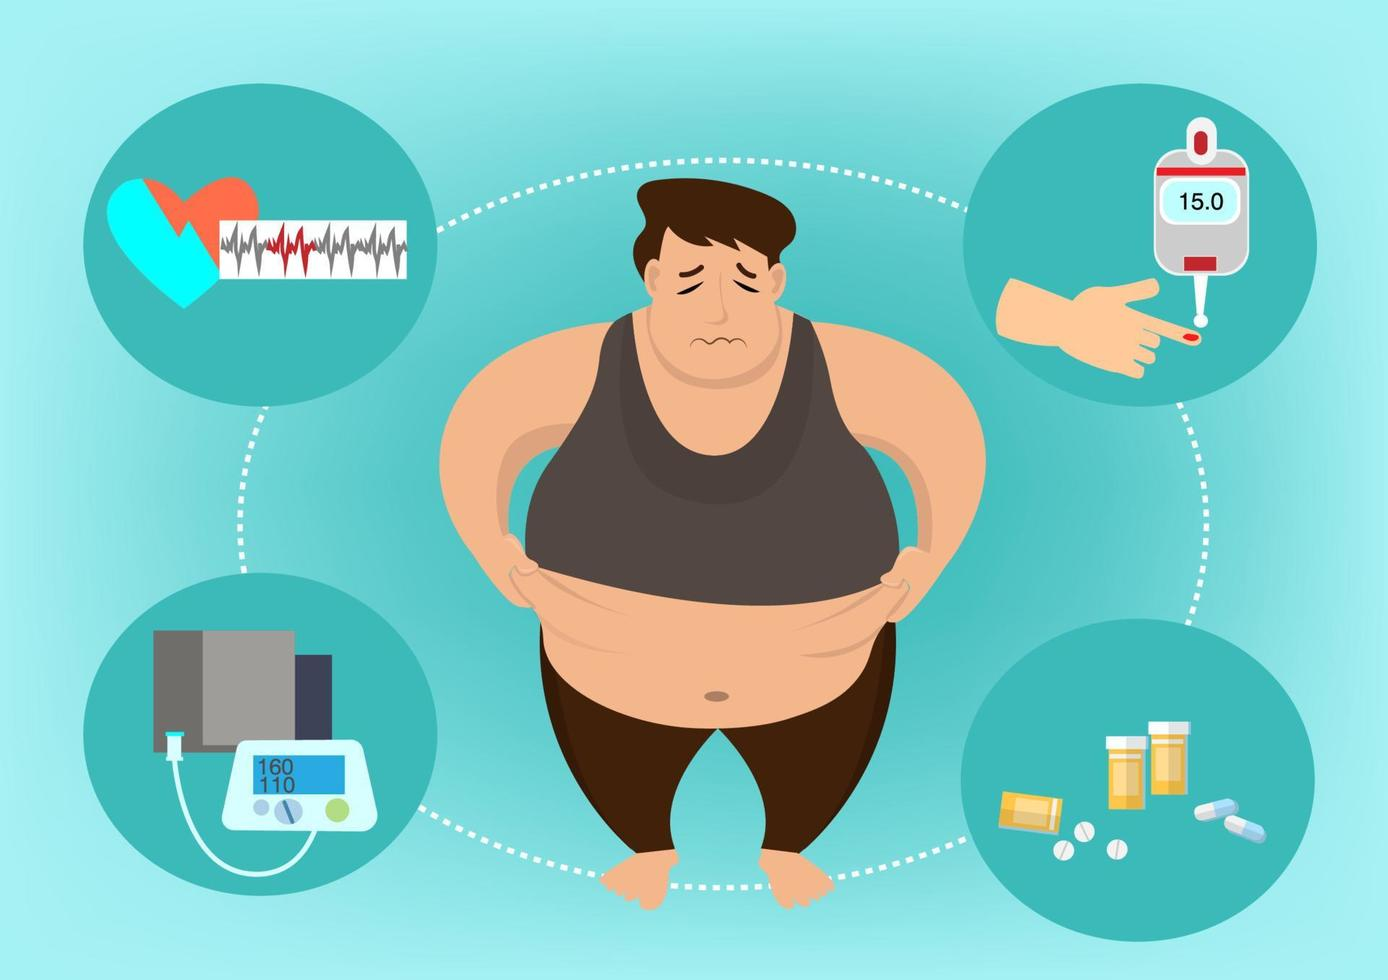

## <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Upvote if you found it helpful ⬆️</div>

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Introduction</div>

This notebook presents an analysis of a dataset focusing on obesity levels in individuals. The primary objective of this analysis is to uncover insights into factors contributing to obesity and to construct a predictive model capable of classifying obesity levels based on the provided features.

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Overview</div>

The dataset comprises several features providing insights into individuals' lifestyles, and physical conditions:

- Gender: Identifies the gender of the individual (e.g., Male or Female).
- Age: Indicates the age of the individual.
- Height: Specifies the height of the individual.
- Weight: Indicates the weight of the individual.
- Family History with Overweight: Indicates whether the individual has a family history of overweight.
- FAVC (Frequent Consumption of High Caloric Food): Indicates frequent consumption of high-caloric food.
- FCVC (Frequency of Consumption of Vegetables): Represents the frequency of vegetable consumption.
- NCP (Number of Main Meals): Specifies the number of main meals consumed by the individual.
- CAEC (Consumption of Food Between Meals): Indicates the frequency of food consumption between meals.
- CH2O (Consumption of Water Daily): Represents the daily consumption of water.
- SCC (Calories Consumption Monitoring): Indicates whether the individual monitors calorie consumption.
- FAF (Physical Activity Frequency): Represents the frequency of physical activity.
- TUE (Time Using Technology Devices): Specifies the time spent using technology devices.
- CALC (Consumption of Alcohol): Indicates alcohol consumption by the individual.
- MTRANS (Transportation Used): Specifies the mode of transportation used by the individual.
- NObeyesdad (Obesity Level): Represents the individual's obesity level (Target).

The dataset contains a total 18 features. Each record corresponds to an individual, with the features providing various insights into their lifestyle and physical condition. The target variable, "NObeyesdad," categorizes individuals into different obesity levels based on predefined categories.

Special thanks to @apalladi for their contribution through their notebook, which provided valuable insights and guidance in the modeling process.

https://www.kaggle.com/code/apalladi/top-10-with-simple-eda-votingclassifier

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Imports</div>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_palette("tab10", n_colors=None, desat=None, color_codes=False)
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
import optuna


In [2]:
pd.set_option('display.max_columns',100)

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
submission=pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
org=pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Exploratory Data Analysis</div>

First, let's take a look at the structure of our dataset and gain a better understanding of its features, data types, and any missing values.


In [4]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [5]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [6]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
def check_nulls(datasets):
    for name, data in datasets.items():
        null_count = data.isnull().sum()
        if null_count.sum() == 0:
            print(f"No null values found in {name} dataset.")
        else:
            print(f"Null values in {name} dataset:")
            null_info = pd.DataFrame({'Column': null_count.index, 'Null Count': null_count.values})
            print(null_info)
            print("\n")
            
datasets = {
    'df': df,
    'test': test,
    'original': org
}


In [9]:
check_nulls(datasets)

No null values found in df dataset.
No null values found in test dataset.
No null values found in original dataset.


In [10]:
org.duplicated().sum()

24

In [11]:
org.drop_duplicates(inplace=True)

In [12]:
df.drop('id',axis=1,inplace=True)

Splitting the data into numerical and categorical features for easier EDA

In [13]:
numerical=[]
categorical=[]
for col in df.columns:
    if df[col].dtype!='object':
        numerical.append(col)
    else: 
        categorical.append(col)

In [14]:
numerical

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [15]:
categorical

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

## Categorical Features

In [16]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

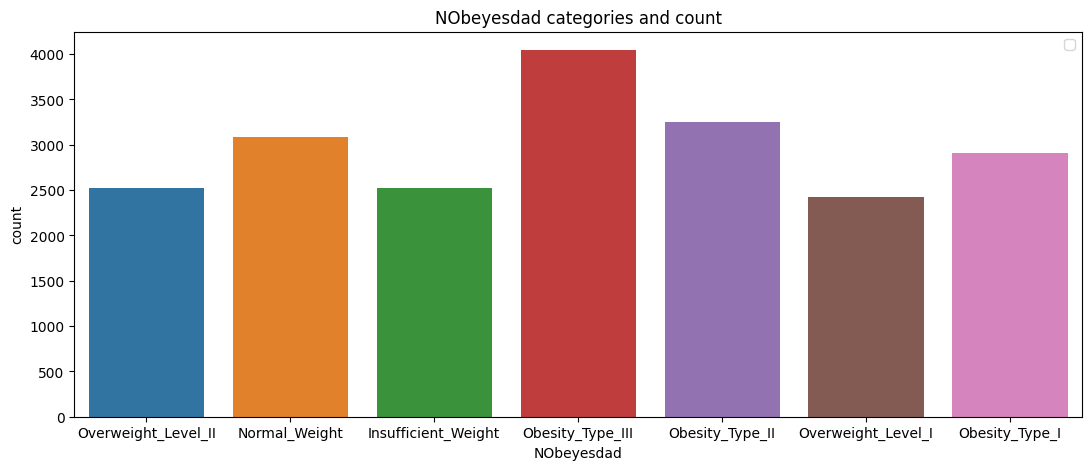

In [17]:
plt.figure(figsize=(13, 5))
sns.countplot(data=df, x='NObeyesdad')
plt.legend(loc='best')
plt.title("NObeyesdad categories and count")
plt.show()

We noticed that men tend to have much less Obesity Type III, while women seem to have less Obesity Type II. There might be different reasons for this.

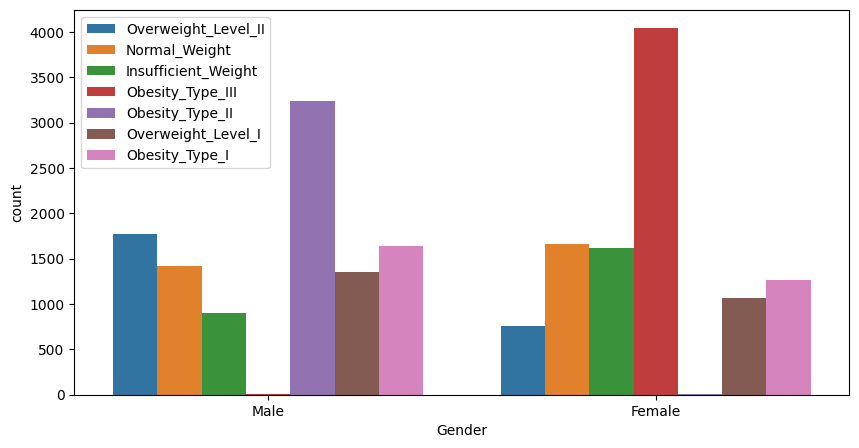

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender', hue='NObeyesdad')
plt.legend(loc='best')
plt.show()

We can see that individuals with frequent consumption of high caloric food are more likely to be obese, which makes sense.

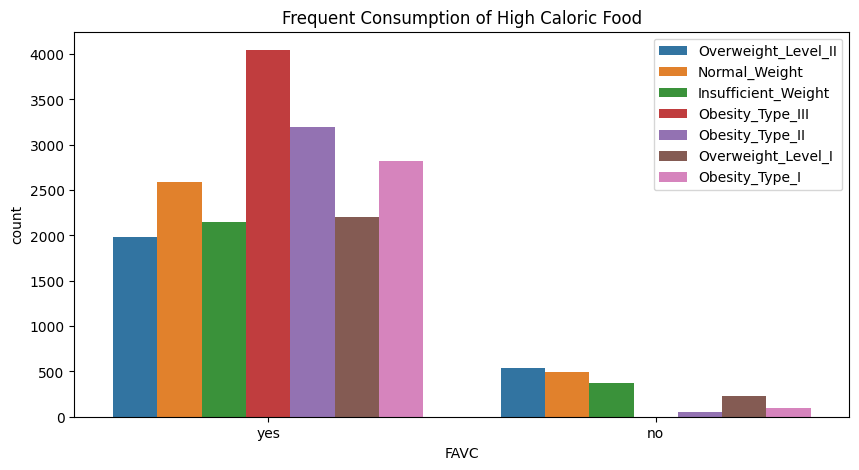

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='FAVC', hue='NObeyesdad')
plt.legend(loc='best')
plt.title("Frequent Consumption of High Caloric Food")
plt.show()

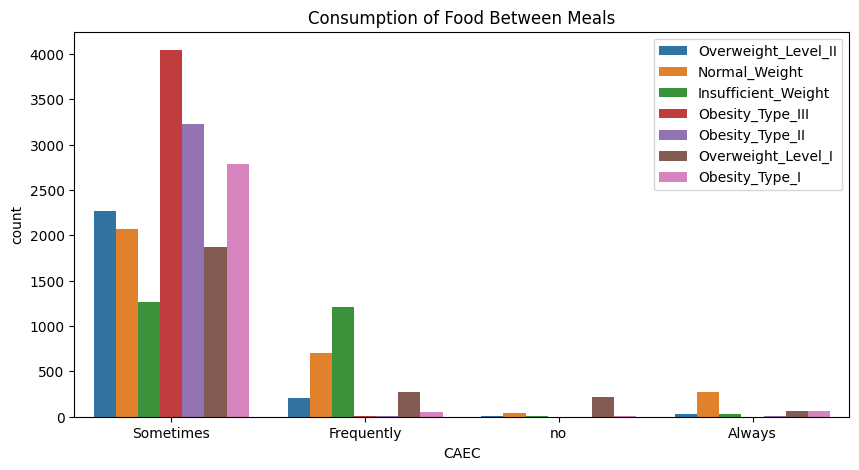

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='CAEC', hue='NObeyesdad')
plt.legend(loc='best')
plt.title("Consumption of Food Between Meals")
plt.show()

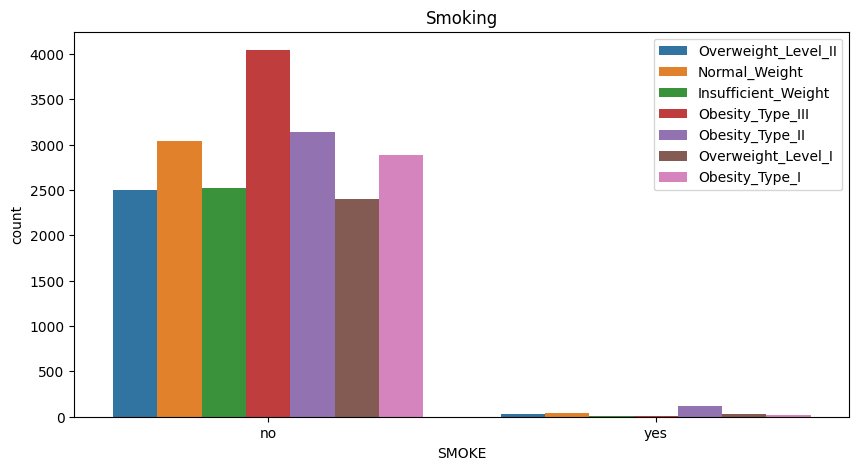

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad')
plt.legend(loc='best')
plt.title("Smoking")
plt.show()

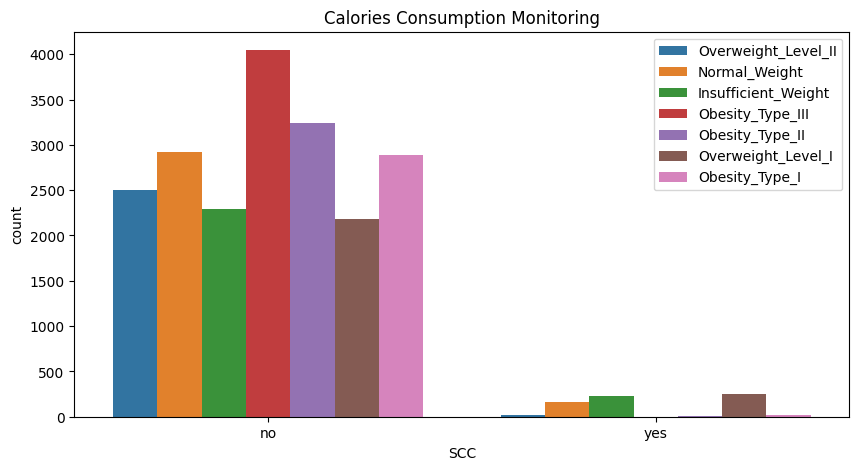

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='SCC', hue='NObeyesdad')
plt.legend(loc='best')
plt.title("Calories Consumption Monitoring")
plt.show()

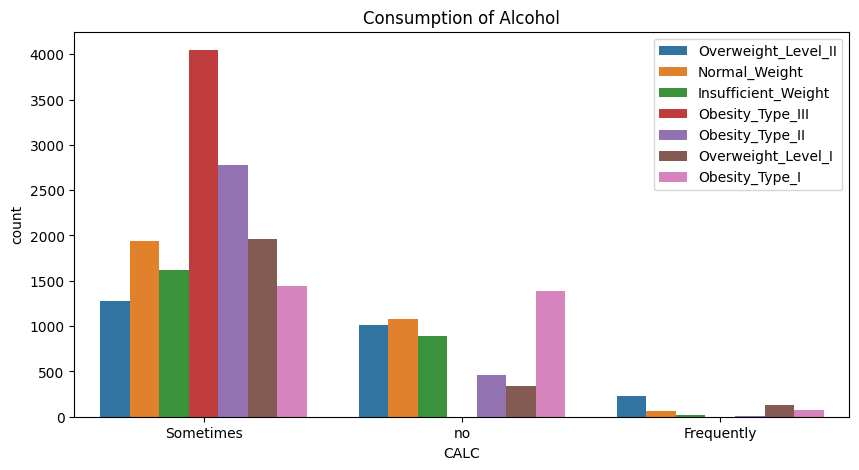

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='CALC', hue='NObeyesdad')
plt.legend(loc='best')
plt.title("Consumption of Alcohol")
plt.show()

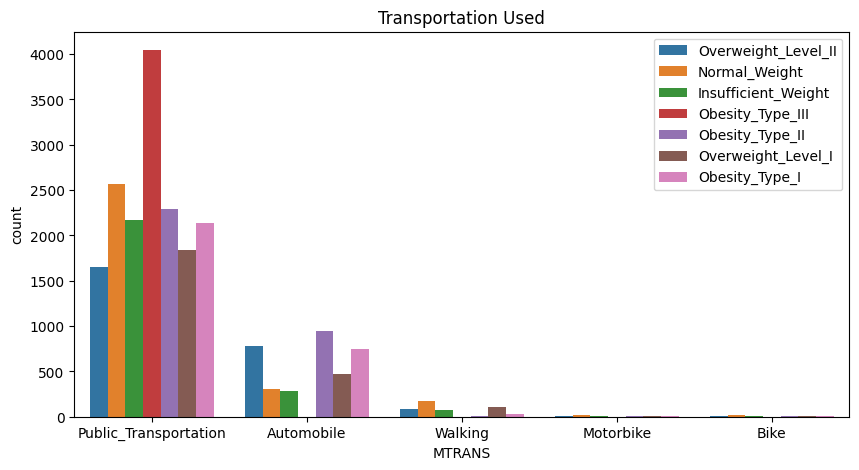

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad')
plt.legend(loc='best')
plt.title("Transportation Used")
plt.show()

****It is visible that there are alot of class imbalances in the categorical features, we will try to deal with it later on.****

## Numerical Features

In the EDA of the numerical features, we will examine the distribution of each feature and search for any outliers or skewness that may be present.

In [25]:
numerical

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

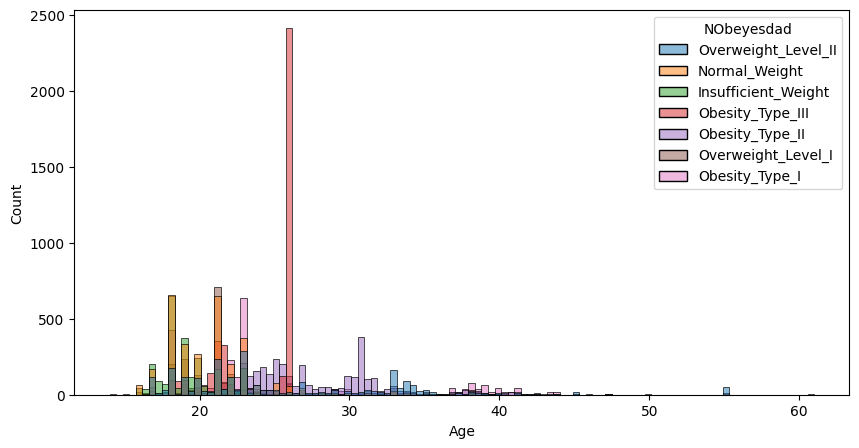

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Age',hue='NObeyesdad')
plt.show()

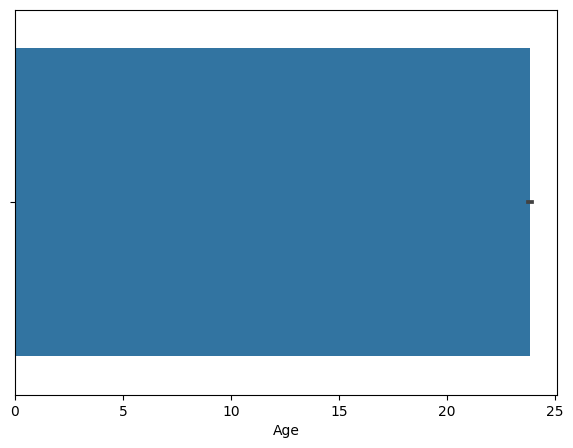

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Age')
plt.show()

In [28]:
print("Skewness: %f" % df['Age'].skew())
print("Kurtosis: %f" % df['Age'].kurt())

Skewness: 1.586252
Kurtosis: 3.700598


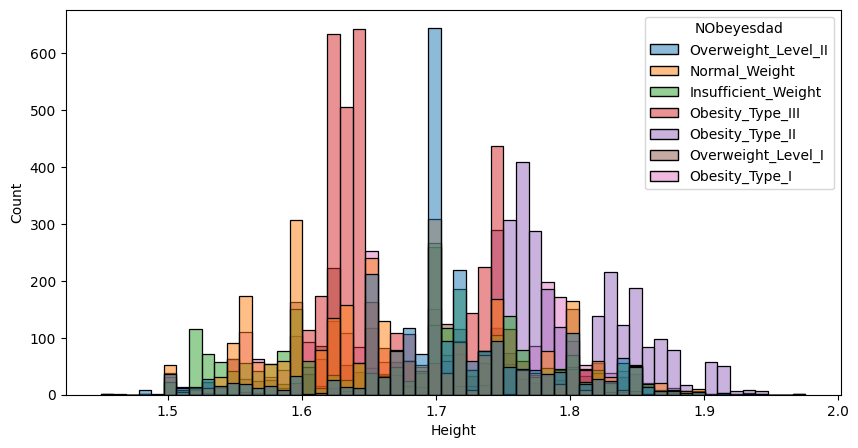

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Height',hue='NObeyesdad')
plt.show()

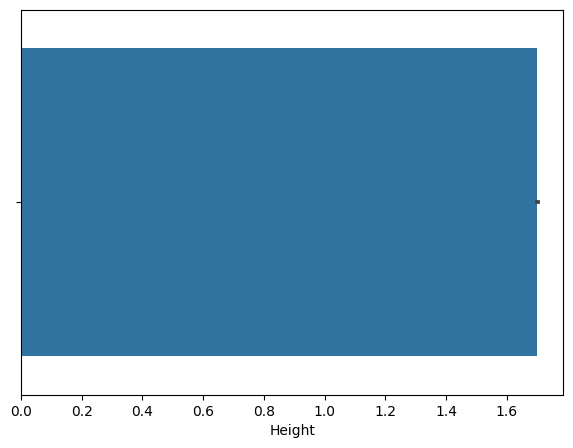

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Height')
plt.show()

In [31]:
print("Skewness: %f" % df['Height'].skew())
print("Kurtosis: %f" % df['Height'].kurt())

Skewness: 0.015803
Kurtosis: -0.559634


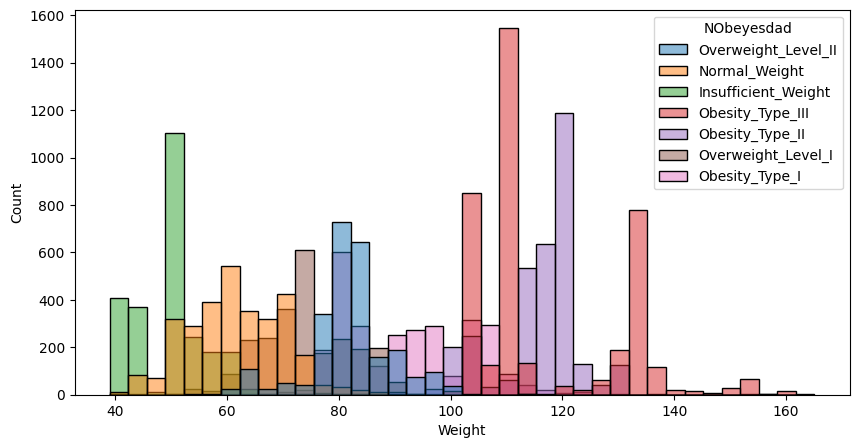

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Weight',hue='NObeyesdad')
plt.show()

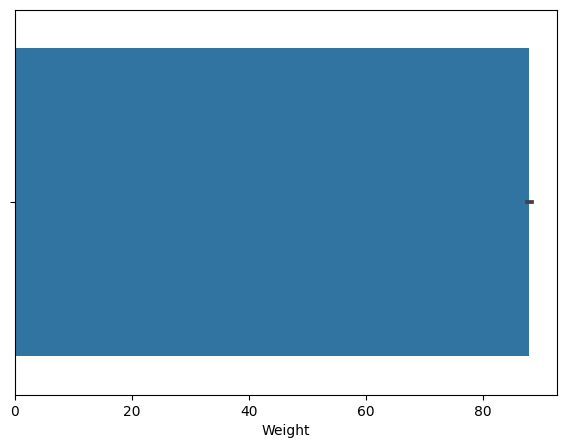

In [33]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Weight')
plt.show()

In [34]:
print("Skewness: %f" % df['Weight'].skew())
print("Kurtosis: %f" % df['Weight'].kurt())

Skewness: 0.093187
Kurtosis: -0.997043


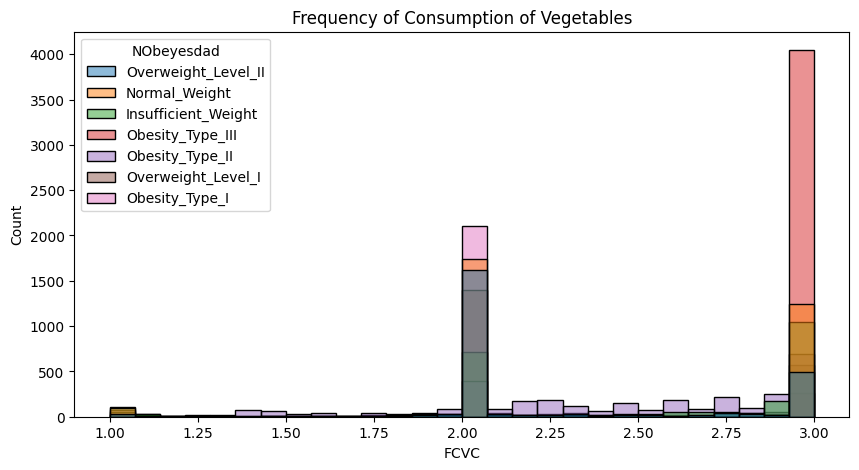

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='FCVC',hue='NObeyesdad')
plt.title("Frequency of Consumption of Vegetables")
plt.show()

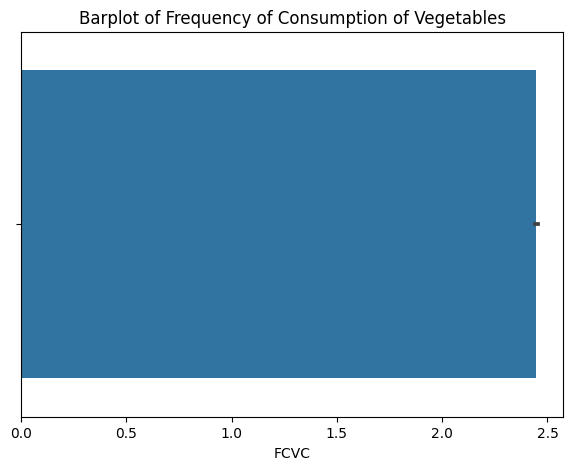

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='FCVC')
plt.title("Barplot of Frequency of Consumption of Vegetables")
plt.show()

In [37]:
print("Skewness: %f" % df['FCVC'].skew())
print("Kurtosis: %f" % df['FCVC'].kurt())

Skewness: -0.356611
Kurtosis: -0.892996


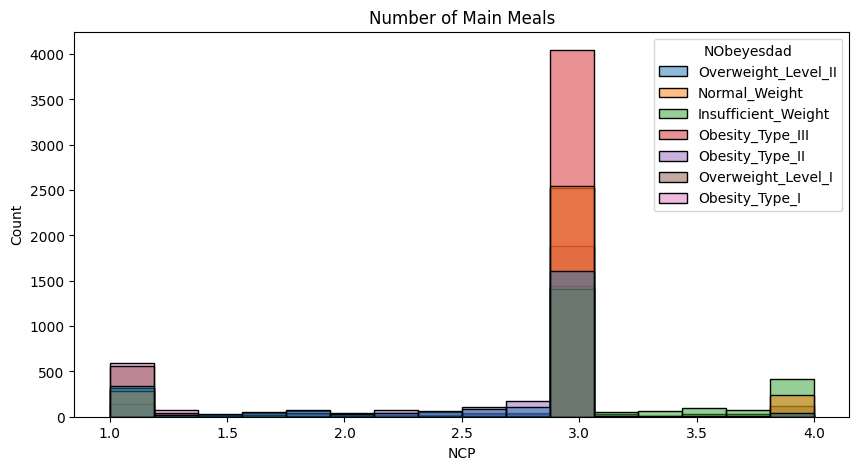

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='NCP',hue='NObeyesdad')
plt.title("Number of Main Meals")
plt.show()

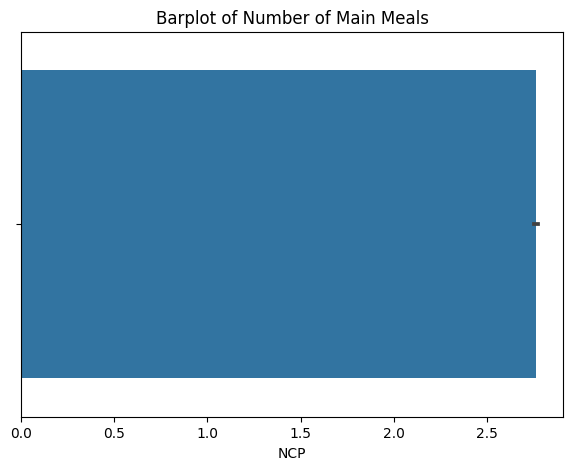

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NCP')
plt.title("Barplot of Number of Main Meals")
plt.show()

In [40]:
print("Skewness: %f" % df['NCP'].skew())
print("Kurtosis: %f" % df['NCP'].kurt())

Skewness: -1.562253
Kurtosis: 1.837270


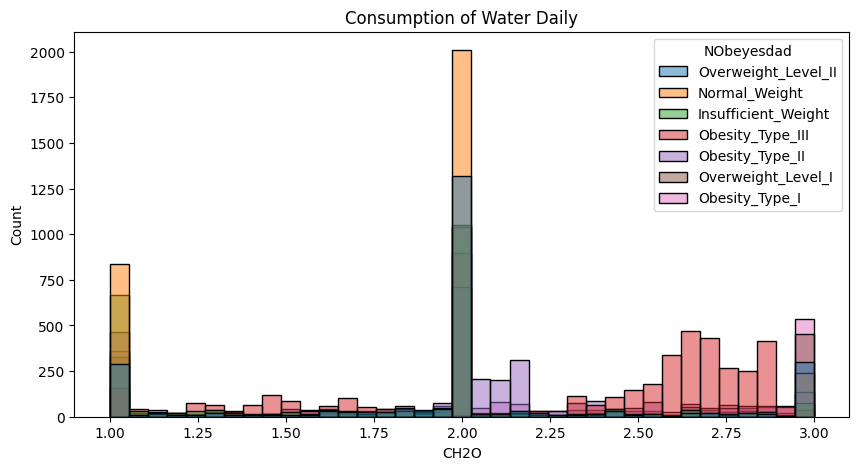

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='CH2O',hue='NObeyesdad')
plt.title("Consumption of Water Daily")
plt.show()

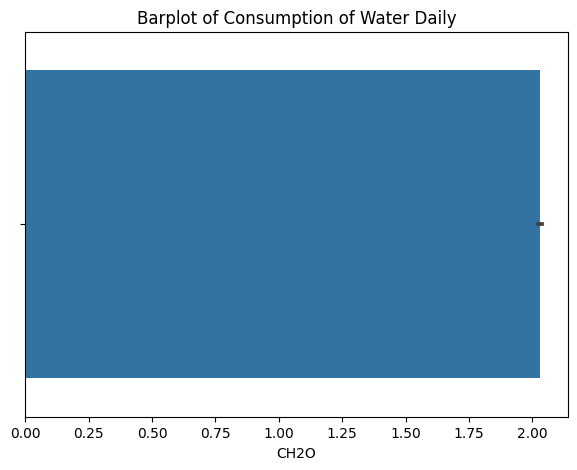

In [42]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='CH2O')
plt.title("Barplot of Consumption of Water Daily")
plt.show()

In [43]:
print("Skewness: %f" % df['CH2O'].skew())
print("Kurtosis: %f" % df['CH2O'].kurt())

Skewness: -0.212506
Kurtosis: -0.744180


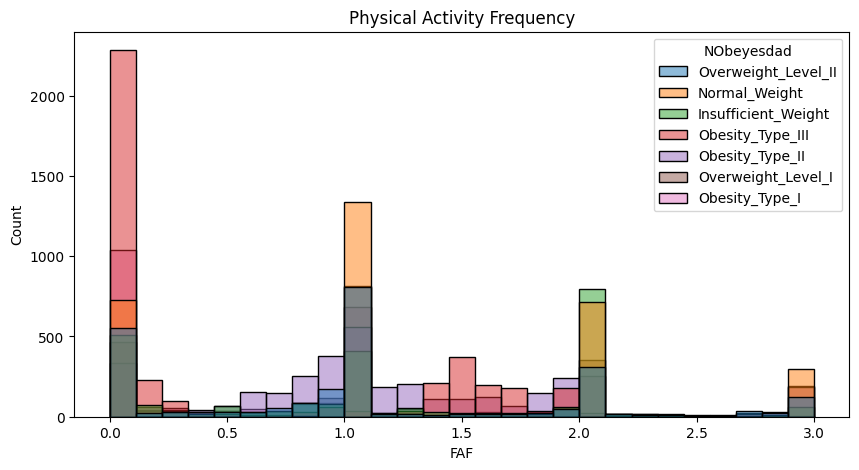

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='FAF',hue='NObeyesdad')
plt.title("Physical Activity Frequency")
plt.show()

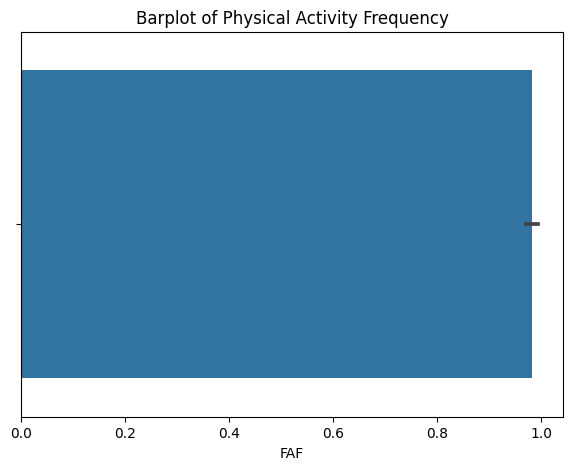

In [45]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='FAF')
plt.title("Barplot of Physical Activity Frequency")
plt.show()

In [46]:
print("Skewness: %f" % df['FAF'].skew())
print("Kurtosis: %f" % df['FAF'].kurt())

Skewness: 0.505726
Kurtosis: -0.494842


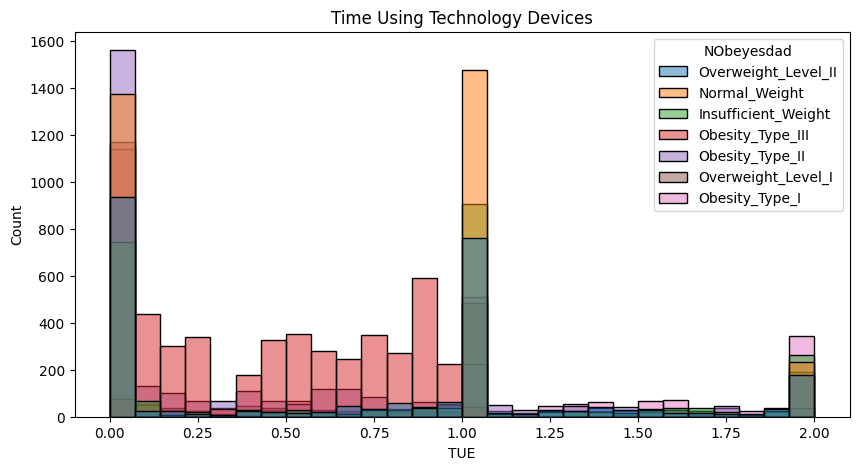

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='TUE',hue='NObeyesdad')
plt.title("Time Using Technology Devices")
plt.show()

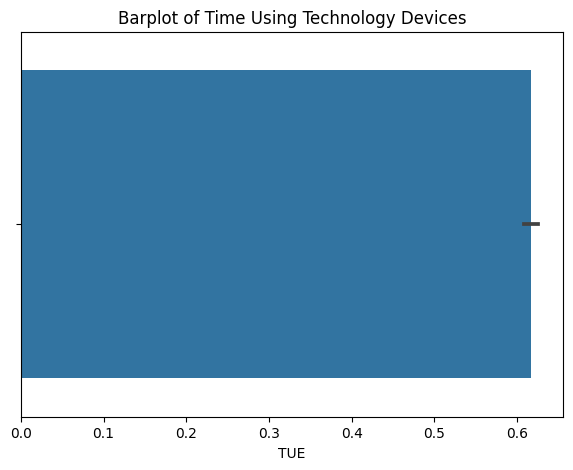

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='TUE')
plt.title("Barplot of Time Using Technology Devices")
plt.show()

In [49]:
print("Skewness: %f" % df['TUE'].skew())
print("Kurtosis: %f" % df['TUE'].kurt())

Skewness: 0.670411
Kurtosis: -0.417730


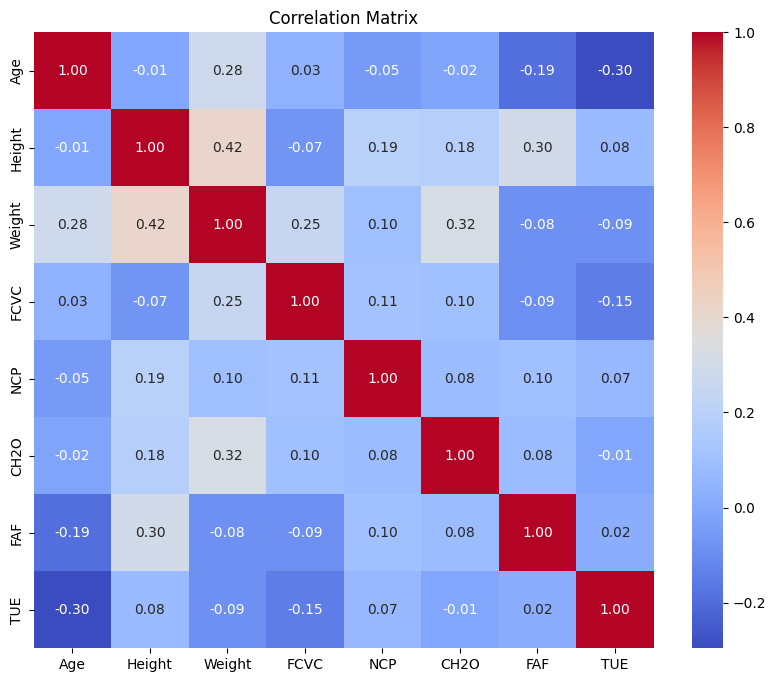

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Feature Engineering</div>


**After trying to create alot of features, those were the most beneficial to the models.**

In [51]:
df['BMI']=df['Weight']/(df['Height']**2)
df['Physical_Activity_level'] = df['FAF'] * (24 - df['TUE']) 
df['Dietary_Habits'] = df['FCVC'] + df['NCP'] + df['CH2O']
df['Physical_Activity_X_BMI'] = df['Physical_Activity_level'] * df['BMI']

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Encoding</div>

**Tested out different ways to encode the data for various features, and found that this method worked the best.**

In [52]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no':0, 'yes':1})
df['FAVC'] = df['FAVC'].map({'no':0, 'yes':1})
df['CAEC'] = df['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df['SMOKE'] = df['SMOKE'].map({'no':0, 'yes':1})
df['SCC'] = df['SCC'].map({'no':0, 'yes':1})
df['CALC'] = df['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})


In [53]:
le=LabelEncoder()
le_encode=['MTRANS']

for col in le_encode:
    df[col]=le.fit_transform(df[col])


In [54]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Physical_Activity_level,Dietary_Habits,Physical_Activity_X_BMI
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,3,Overweight_Level_II,28.259565,0.000000,7.746870,0.000000
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,0,Normal_Weight,23.422091,23.000000,7.000000,538.708087
2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,3,Insufficient_Weight,17.126706,19.335681,5.202597,331.156519
3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,3,Obesity_Type_III,44.855798,34.083487,7.674061,1528.842011
4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,3,Overweight_Level_II,25.599151,45.397750,6.630984,1162.143862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1,0,2.151809,0,1.330519,0.196680,1,3,Obesity_Type_II,36.587084,31.670770,8.071393,1158.741092
20754,0,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2,0,1.000000,0,2.000000,1.000000,1,3,Insufficient_Weight,17.099278,46.000000,8.000000,786.566807
20755,0,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1,0,2.000000,0,1.158040,1.198439,0,3,Obesity_Type_II,31.889841,26.405120,7.407817,842.055056
20756,0,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1,0,2.144838,0,0.000000,0.973834,0,0,Overweight_Level_II,28.899693,0.000000,6.787548,0.000000


In [55]:
df['NObeyesdad']=df['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})

In [56]:
X=df.drop('NObeyesdad',axis=1)
y=df['NObeyesdad']

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Feature Importance</div>

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 20758, number of used features: 20
[LightGBM] [Info] Start training from score -2.107483
[LightGBM] [Info] Start training from score -1.907353
[LightGBM] [Info] Start training from score -2.146276
[LightGBM] [Info] Start training from score -2.107879
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.854892
[LightGBM] [Info] Start training from score -1.635203


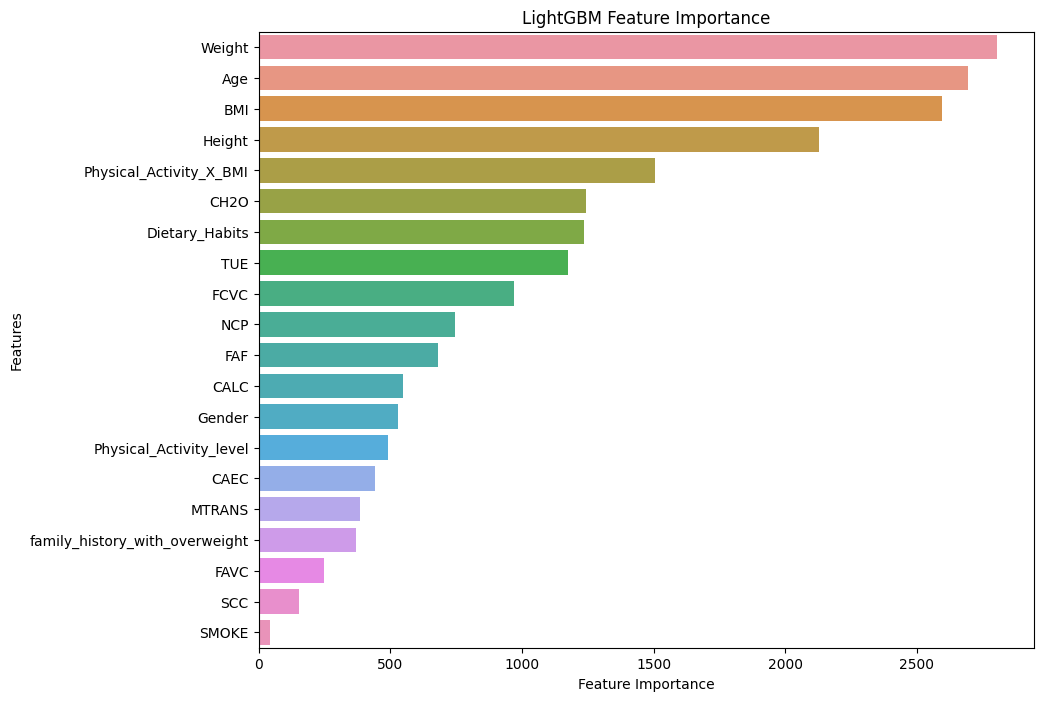

In [57]:
model_lgb = LGBMClassifier()
model_lgb.fit(X, y)

importances = model_lgb.feature_importances_
indices = np.argsort(importances)[::-1]

top_features = X.columns[indices][:22]
top_features_list = top_features.tolist()

plt.figure(figsize=(10, 8))
sns.barplot(y=X.columns[indices], x=importances[indices], orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('LightGBM Feature Importance')
plt.show()

# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Modelling</div>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Baseline models:

In [60]:
lgb_model = LGBMClassifier(n_estimators=100, random_state=42)

lgb_model.fit(X_train, y_train)

lgb_predictions = lgb_model.predict(X_test)

lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print("LightGBM Accuracy:", lgb_accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3047
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 20
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
LightGBM Accuracy: 0.905587668593449


In [61]:
catboost_model = CatBoostClassifier(n_estimators=100, random_state=42, silent=True)

catboost_model.fit(X_train, y_train)

catboost_predictions = catboost_model.predict(X_test)

catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

CatBoost Accuracy: 0.8964354527938343


In [62]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9089595375722543


In [63]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8959537572254336


### Tuning with optuna

In [64]:
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0.0, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'eval_metric': 'mlogloss',
#     }

#     model_xgb = XGBClassifier(**params)
#     model_xgb.fit(X_train, y_train)
#     y_pred = model_xgb.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     return accuracy

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)

# best_accuracy = study.best_value
# best_params_xgb = study.best_params

# model_xgb = XGBClassifier(**best_params_xgb, random_state=42)
# model_xgb.fit(X_train, y_train)  
# y_pred = model_xgb.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("Best accuracy:", best_accuracy)
# print("Best hyperparameters:", best_params_xgb)
# print("Accuracy:", accuracy)

In [65]:
best_params_xgb= {'n_estimators': 1486,
                       'learning_rate': 0.06587624553881603,
                       'max_depth': 4,
                       'subsample': 0.8859602767728625, 
                       'colsample_bytree': 0.7611349579229303,
                       'min_child_weight': 1.0350218377113882,
                       'gamma': 0.4831569224926895,
                       'reg_alpha': 0.07518721878469098,
                       'reg_lambda': 0.7164989918288989}

In [66]:
xgb_model = XGBClassifier(**best_params_xgb)

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.9111271676300579


## Test Script

In [67]:

def preprocess_test(df):
    
    df['BMI']=df['Weight']/(df['Height']**2)
    df['Physical_Activity_level'] = df['FAF'] * (24 - df['TUE'])
    df['Dietary_Habits'] = df['FCVC'] + df['NCP'] + df['CH2O']
    df['Physical_Activity_X_BMI'] = df['Physical_Activity_level'] * df['BMI']
    
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no':0, 'yes':1})
    df['FAVC'] = df['FAVC'].map({'no':0, 'yes':1})
    df['CAEC'] = df['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    df['SMOKE'] = df['SMOKE'].map({'no':0, 'yes':1})
    df['SCC'] = df['SCC'].map({'no':0, 'yes':1})
    df['CALC'] = df['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})    
    
    for col in le_encode:
        df[col]=le.fit_transform(df[col])

    return df

In [68]:
test=preprocess_test(test)

In [69]:
test.drop('id',axis=1,inplace=True)

In [70]:
test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Physical_Activity_level,Dietary_Habits,Physical_Activity_X_BMI
0,0,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,3,35.315411,20.529600,8.764245,725.011256
1,1,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,3,25.781250,24.000000,6.000000,618.750000
2,1,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,3,41.324115,0.000000,8.621877,0.000000
3,0,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,3,42.976937,2.276424,7.764326,97.833730
4,1,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,3,39.584143,0.000000,8.653531,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,1,0,1.000000,0,0.807076,0.778632,1,3,26.333478,18.741409,6.813234,493.526468
13836,1,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,1,0,2.000000,0,0.000000,0.000000,1,3,24.524346,0.000000,8.000000,0.000000
13837,1,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,2,0,2.000000,0,1.949840,1.000000,1,3,17.652091,44.846320,7.273740,791.631301
13838,0,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,1,0,2.000000,0,3.000000,2.000000,0,3,20.195092,66.000000,7.000000,1332.876086


# <div align="center" style="padding: 10px; background-color: #3366ff; color: white; font-weight: bold; border-radius: 5px;">Submission</div>

In [71]:
X_test_t = scaler.transform(test)

In [72]:
predictions=xgb_model.predict(X_test_t)

In [73]:
submission

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [74]:
sub = pd.DataFrame({
    'id': submission['id'],
    'NObeyesdad': predictions
})

# Map encoded labels back to original categories
sub['NObeyesdad'] = sub['NObeyesdad'].map({
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
})




In [75]:
sub

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
